In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/others/carprices.csv
/kaggle/input/others/canada_per_capita.csv
/kaggle/input/others/Movie_classification.csv
/kaggle/input/others/hiring.csv
/kaggle/input/others/house-votes-84.csv
/kaggle/input/others/xrayfull.csv
/kaggle/input/others/insurance_data.csv
/kaggle/input/others/daily-min-temperatures.csv
/kaggle/input/others/nih_labels.csv
/kaggle/input/others/Customer.csv
/kaggle/input/others/us-airlines-monthly-aircraft-miles-flown.csv
/kaggle/input/others/MBA_ADMISSIONS.csv
/kaggle/input/others/salaries.csv
/kaggle/input/others/Movie_regression.xls
/kaggle/input/others/House_Price.csv
/kaggle/input/others/shampoo.csv
/kaggle/input/others/daily-total-female-births-CA.csv


## UPVOTE IF U LIKE

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import seaborn as sns
from sklearn import preprocessing 
from category_encoders import *
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix

# Loading Datasets

In [3]:
df = pd.read_csv('../input/others/House_Price.csv')
df

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0     24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1     21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2     34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3     33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4     36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   
..     ...         ...         ...       ...       ...   ...    ...    ...   
501   22.4     0.06263       41.93     0.573     6.593  69.1   2.64   2.45   
502   20.6     0.04527       41.93     0.573     6.120  76.7   2.44   2.11   
503   23.9     0.06076       41.93     0.573     6.976  91.0   2.34   2.06   
504   22.0     0.10959       41.93     0.573     6.794  89.3   2.54   2.31   
505   19.0     0.04741       41.93     0.573     6.030  80.8   2.72   2.24   

     dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
0     4.18   4.01      24.7       4.98     YES       5.480      11.1920   
1     5.12   5.06      22.2       9.14      NO       7.332      12.1728   
2     5.01   4.97      22.2       4.03      NO       7.394     101.1200   
3     6.16   5.96      21.3       2.94     YES       9.268      11.2672   
4     6.37   5.86      21.3       5.33      NO       8.824      11.2896   
..     ...    ...       ...        ...     ...         ...          ...   
501   2.76   2.06      19.0       9.67      NO       9.348      12.1792   
502   2.46   2.14      19.0       9.08     YES       6.612      13.1648   
503   2.29   1.98      19.0       5.64      NO       5.478      12.1912   
504   2.40   2.31      19.0       6.48     YES       7.940      15.1760   
505   2.64   2.42      19.0       7.88     YES      10.280      10.1520   

          waterbody  rainfall bus_ter     parks  
0             River        23     YES  0.049347  
1              Lake        42     YES  0.046146  
2              None        38     YES  0.045764  
3              Lake        45     YES  0.047151  
4              Lake        55     YES  0.039474  
..              ...       ...     ...       ...  
501  Lake and River        27     YES  0.056006  
502  Lake and River        20     YES  0.059903  
503            None        31     YES  0.057572  
504            None        47     YES  0.060694  
505            None        45     YES  0.060336  

[506 rows x 19 columns]

# Exploratory Data Analysis

In [4]:
df.head()

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0   24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1   21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2   34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3   33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4   36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
0   4.18   4.01      24.7       4.98     YES       5.480      11.1920   
1   5.12   5.06      22.2       9.14      NO       7.332      12.1728   
2   5.01   4.97      22.2       4.03      NO       7.394     101.1200   
3   6.16   5.96      21.3       2.94     YES       9.268      11.2672   
4   6.37   5.86      21.3       5.33      NO       8.824      11.2896   

  waterbody  rainfall bus_ter     parks  
0     River        23     YES  0.049347  
1      Lake        42     YES  0.046146  
2      None        38     YES  0.045764  
3      Lake        45     YES  0.047151  
4      Lake        55     YES  0.039474

In [5]:
df.tail()

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
501   22.4     0.06263       41.93     0.573     6.593  69.1   2.64   2.45   
502   20.6     0.04527       41.93     0.573     6.120  76.7   2.44   2.11   
503   23.9     0.06076       41.93     0.573     6.976  91.0   2.34   2.06   
504   22.0     0.10959       41.93     0.573     6.794  89.3   2.54   2.31   
505   19.0     0.04741       41.93     0.573     6.030  80.8   2.72   2.24   

     dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
501   2.76   2.06      19.0       9.67      NO       9.348      12.1792   
502   2.46   2.14      19.0       9.08     YES       6.612      13.1648   
503   2.29   1.98      19.0       5.64      NO       5.478      12.1912   
504   2.40   2.31      19.0       6.48     YES       7.940      15.1760   
505   2.64   2.42      19.0       7.88     YES      10.280      10.1520   

          waterbody  rainfall bus_ter     parks  
501  Lake and River        27     YES  0.056006  
502  Lake and River        20     YES  0.059903  
503            None        31     YES  0.057572  
504            None        47     YES  0.060694  
505            None        45     YES  0.060336

In [6]:
df.dtypes

price          float64
crime_rate     float64
resid_area     float64
air_qual       float64
room_num       float64
age            float64
dist1          float64
dist2          float64
dist3          float64
dist4          float64
teachers       float64
poor_prop      float64
airport         object
n_hos_beds     float64
n_hot_rooms    float64
waterbody       object
rainfall         int64
bus_ter         object
parks          float64
dtype: object

In [7]:
df.shape

(506, 19)

In [8]:
df.size

9614

In [9]:
df.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 'airport',
       'n_hos_beds', 'n_hot_rooms', 'waterbody', 'rainfall', 'bus_ter',
       'parks'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [11]:
df.describe()

price  crime_rate  resid_area    air_qual    room_num         age  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.528854    3.613524   41.136779    0.554695    6.284634   68.574901   
std      9.182176    8.601545    6.860353    0.115878    0.702617   28.148861   
min      5.000000    0.006320   30.460000    0.385000    3.561000    2.900000   
25%     17.025000    0.082045   35.190000    0.449000    5.885500   45.025000   
50%     21.200000    0.256510   39.690000    0.538000    6.208500   77.500000   
75%     25.000000    3.677083   48.100000    0.624000    6.623500   94.075000   
max     50.000000   88.976200   57.740000    0.871000    8.780000  100.000000   

            dist1       dist2       dist3       dist4    teachers   poor_prop  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.971996    3.628775    3.960672    3.618972   21.544466   12.653063   
std      2.108532    2.108580    2.119797    2.099203    2.164946    7.141062   
min      1.130000    0.920000    1.150000    0.730000   18.000000    1.730000   
25%      2.270000    1.940000    2.232500    1.940000   19.800000    6.950000   
50%      3.385000    3.010000    3.375000    3.070000   20.950000   11.360000   
75%      5.367500    4.992500    5.407500    4.985000   22.600000   16.955000   
max     12.320000   11.930000   12.320000   11.940000   27.400000   37.970000   

       n_hos_beds  n_hot_rooms    rainfall       parks  
count  498.000000   506.000000  506.000000  506.000000  
mean     7.899767    13.041605   39.181818    0.054454  
std      1.476683     5.238957   12.513697    0.010632  
min      5.268000    10.057600    3.000000    0.033292  
25%      6.634500    11.189800   28.000000    0.046464  
50%      7.999000    12.720000   39.000000    0.053507  
75%      9.088000    14.170800   50.000000    0.061397  
max     10.876000   101.120000   60.000000    0.086711

In [12]:
df.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop(['airport','waterbody','bus_ter'],axis = 1).skew()

price           1.110912
crime_rate      5.223149
resid_area      0.295022
air_qual        0.729308
room_num        0.403612
age            -0.598963
dist1           1.010577
dist2           1.007492
dist3           1.003848
dist4           1.004680
teachers        0.802325
poor_prop       0.906460
n_hos_beds     -0.009176
n_hot_rooms    13.790552
rainfall        0.012971
parks           0.533991
dtype: float64

In [15]:
df.drop(['airport','waterbody','bus_ter'],axis = 1).corr()

price  crime_rate  resid_area  air_qual  room_num       age  \
price        1.000000   -0.389582   -0.484754 -0.429300  0.696304 -0.377999   
crime_rate  -0.389582    1.000000    0.406583  0.420972 -0.219247  0.352734   
resid_area  -0.484754    0.406583    1.000000  0.763651 -0.391676  0.644779   
air_qual    -0.429300    0.420972    0.763651  1.000000 -0.302188  0.731470   
room_num     0.696304   -0.219247   -0.391676 -0.302188  1.000000 -0.240265   
age         -0.377999    0.352734    0.644779  0.731470 -0.240265  1.000000   
dist1        0.251355   -0.380050   -0.706481 -0.768589  0.208464 -0.746904   
dist2        0.249459   -0.379813   -0.707956 -0.769724  0.203981 -0.746493   
dist3        0.246650   -0.380069   -0.707566 -0.769157  0.201907 -0.747021   
dist4        0.248200   -0.376462   -0.705819 -0.764873  0.205397 -0.746707   
teachers     0.505655   -0.289946   -0.383248 -0.188933  0.355501 -0.261515   
poor_prop   -0.740836    0.455621    0.603800  0.590879 -0.613808  0.602339   
n_hos_beds   0.109646    0.017502    0.005827 -0.049954  0.032207 -0.021102   
n_hot_rooms  0.023122    0.013518   -0.000839 -0.004882  0.030674  0.009380   
rainfall    -0.047426    0.059204    0.055810  0.092104 -0.064694  0.075198   
parks       -0.391574    0.383235    0.707635  0.915544 -0.282817  0.673850   

                dist1     dist2     dist3     dist4  teachers  poor_prop  \
price        0.251355  0.249459  0.246650  0.248200  0.505655  -0.740836   
crime_rate  -0.380050 -0.379813 -0.380069 -0.376462 -0.289946   0.455621   
resid_area  -0.706481 -0.707956 -0.707566 -0.705819 -0.383248   0.603800   
air_qual    -0.768589 -0.769724 -0.769157 -0.764873 -0.188933   0.590879   
room_num     0.208464  0.203981  0.201907  0.205397  0.355501  -0.613808   
age         -0.746904 -0.746493 -0.747021 -0.746707 -0.261515   0.602339   
dist1        1.000000  0.997905  0.997735  0.994073  0.232834  -0.498823   
dist2        0.997905  1.000000  0.998097  0.994003  0.233707  -0.495693   
dist3        0.997735  0.998097  1.000000  0.994126  0.233588  -0.494290   
dist4        0.994073  0.994003  0.994126  1.000000  0.228256  -0.496084   
teachers     0.232834  0.233707  0.233588  0.228256  1.000000  -0.374044   
poor_prop   -0.498823 -0.495693 -0.494290 -0.496084 -0.374044   1.000000   
n_hos_beds  -0.030550 -0.031248 -0.028471 -0.021648 -0.008130  -0.066434   
n_hot_rooms -0.014463 -0.010239 -0.010077 -0.005850 -0.023343   0.003337   
rainfall    -0.036794 -0.038005 -0.041470 -0.032542 -0.045836   0.061581   
parks       -0.706319 -0.708237 -0.709346 -0.703508 -0.187004   0.552310   

             n_hos_beds  n_hot_rooms  rainfall     parks  
price          0.109646     0.023122 -0.047426 -0.391574  
crime_rate     0.017502     0.013518  0.059204  0.383235  
resid_area     0.005827    -0.000839  0.055810  0.707635  
air_qual      -0.049954    -0.004882  0.092104  0.915544  
room_num       0.032207     0.030674 -0.064694 -0.282817  
age           -0.021102     0.009380  0.075198  0.673850  
dist1         -0.030550    -0.014463 -0.036794 -0.706319  
dist2         -0.031248    -0.010239 -0.038005 -0.708237  
dist3         -0.028471    -0.010077 -0.041470 -0.709346  
dist4         -0.021648    -0.005850 -0.032542 -0.703508  
teachers      -0.008130    -0.023343 -0.045836 -0.187004  
poor_prop     -0.066434     0.003337  0.061581  0.552310  
n_hos_beds     1.000000    -0.005461  0.058997 -0.072002  
n_hot_rooms   -0.005461     1.000000 -0.004840  0.006262  
rainfall       0.058997    -0.004840  1.000000  0.078641  
parks         -0.072002     0.006262  0.078641  1.000000

# Data Visualisation Using Autoviz

In [16]:
! pip install Autoviz

     |████████████████████████████████| 44 kB 119 kB/s 


In [17]:
! pip install xlrd

     |████████████████████████████████| 96 kB 369 kB/s 


Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (506, 19)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  15
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0


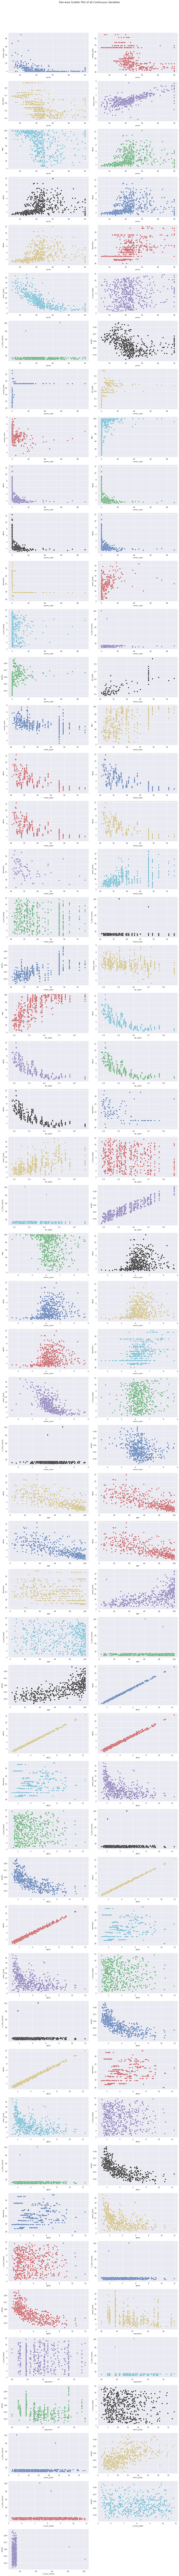

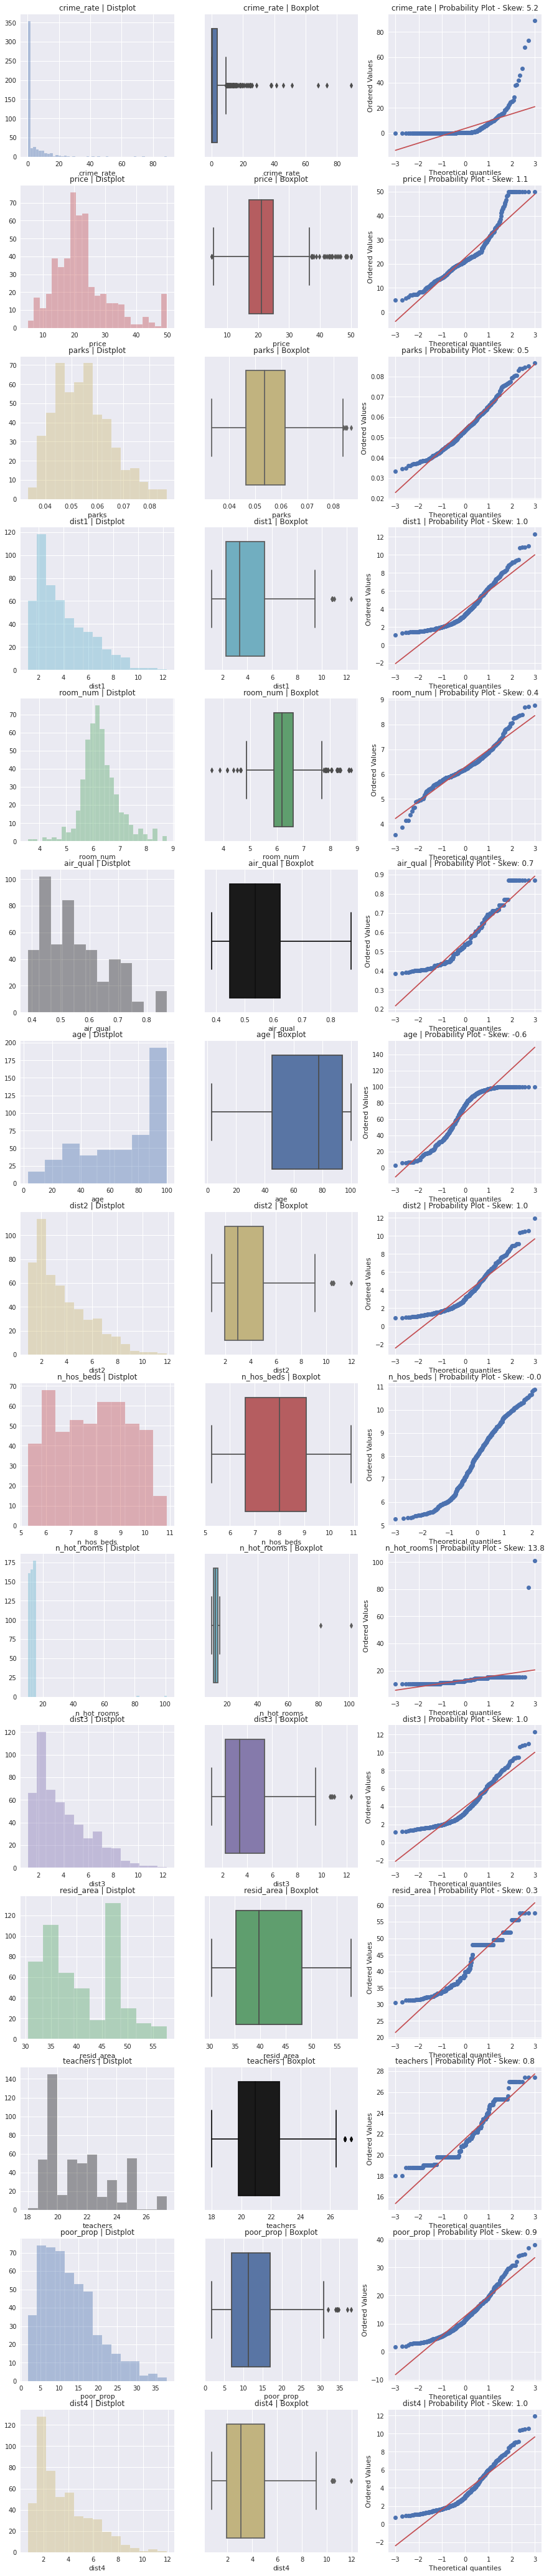

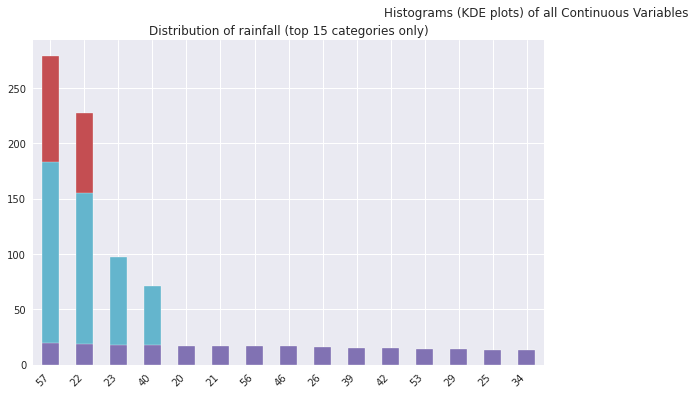

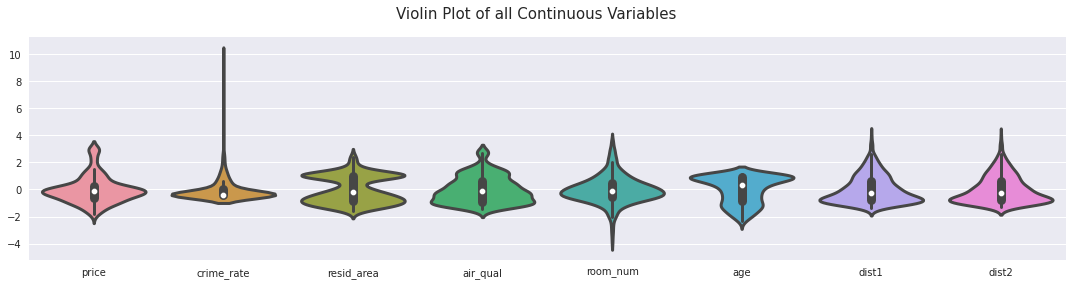

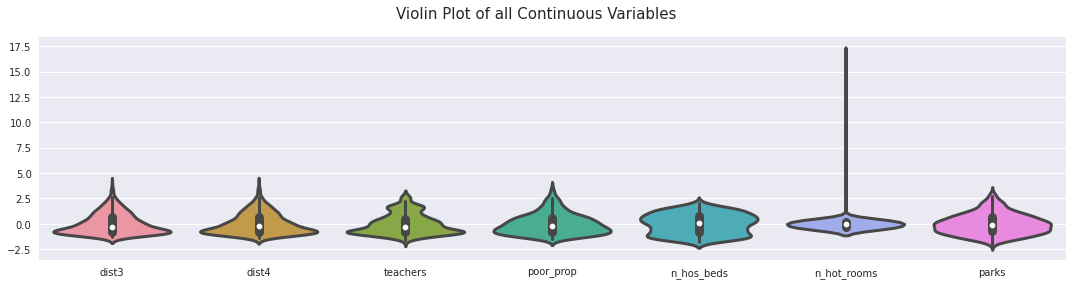

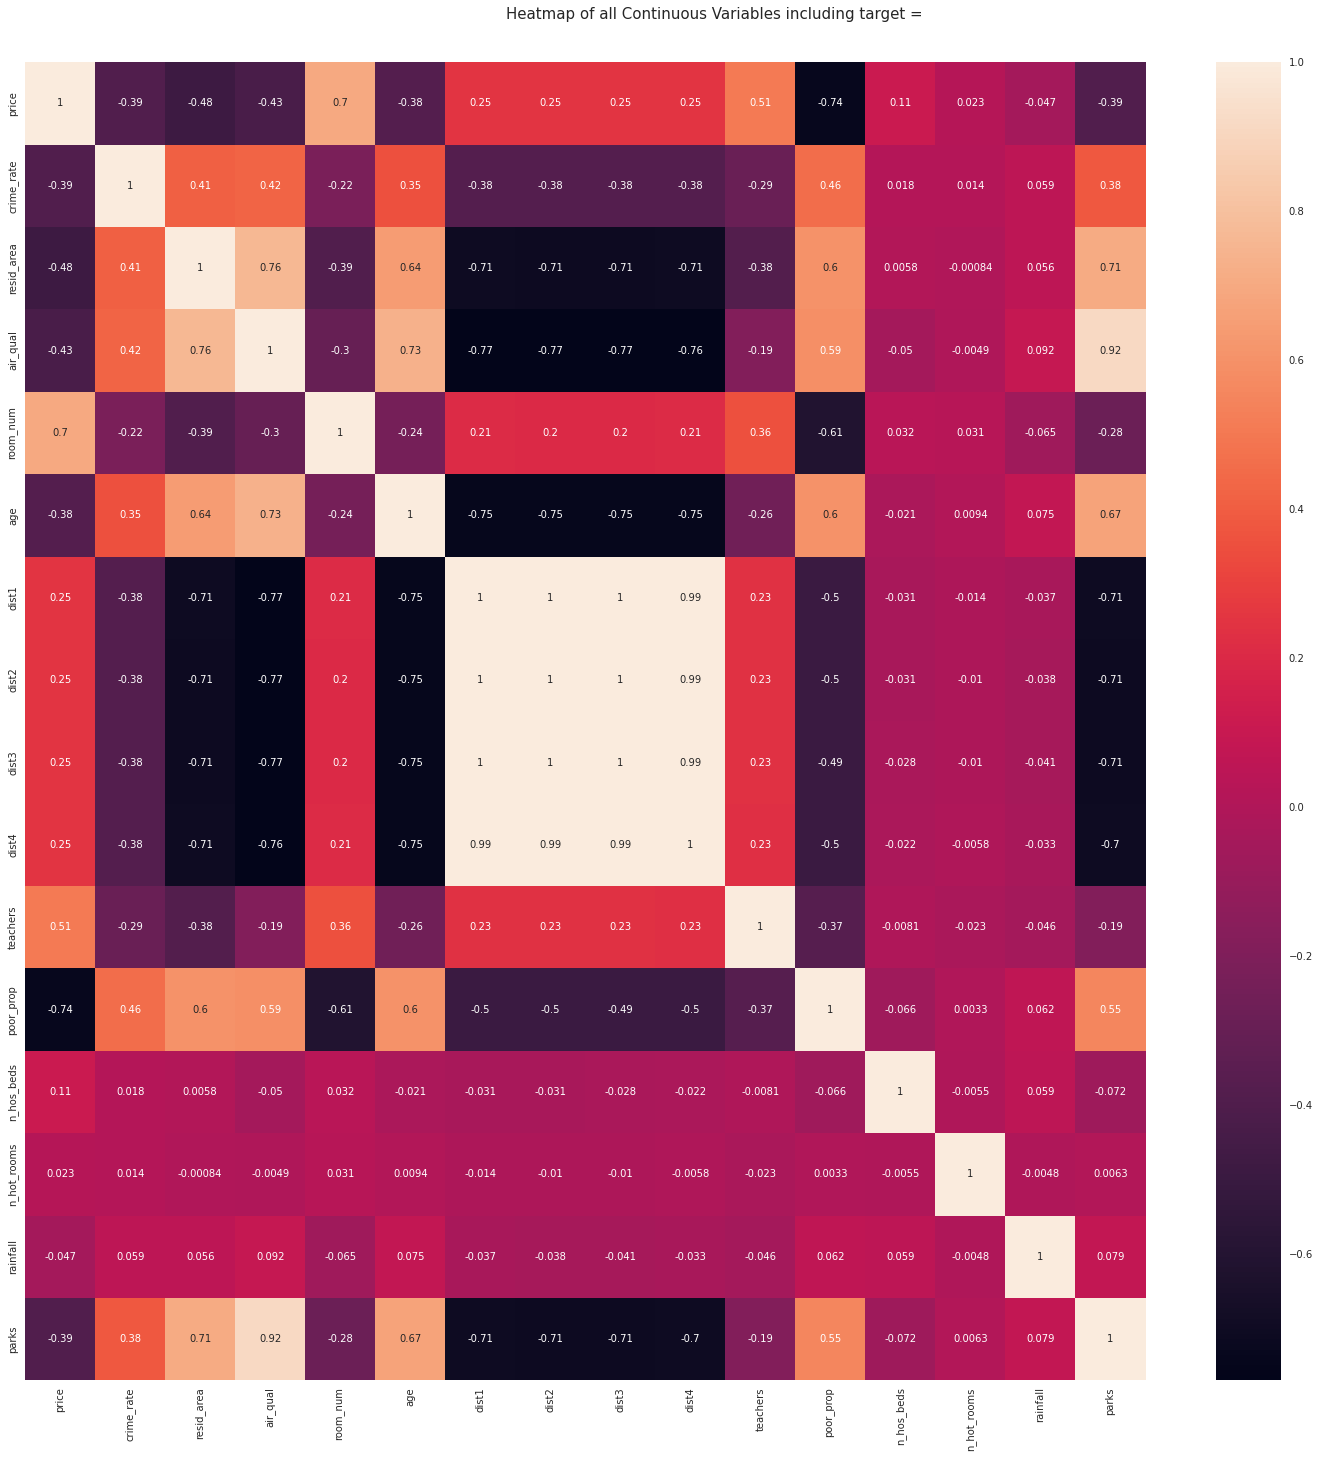

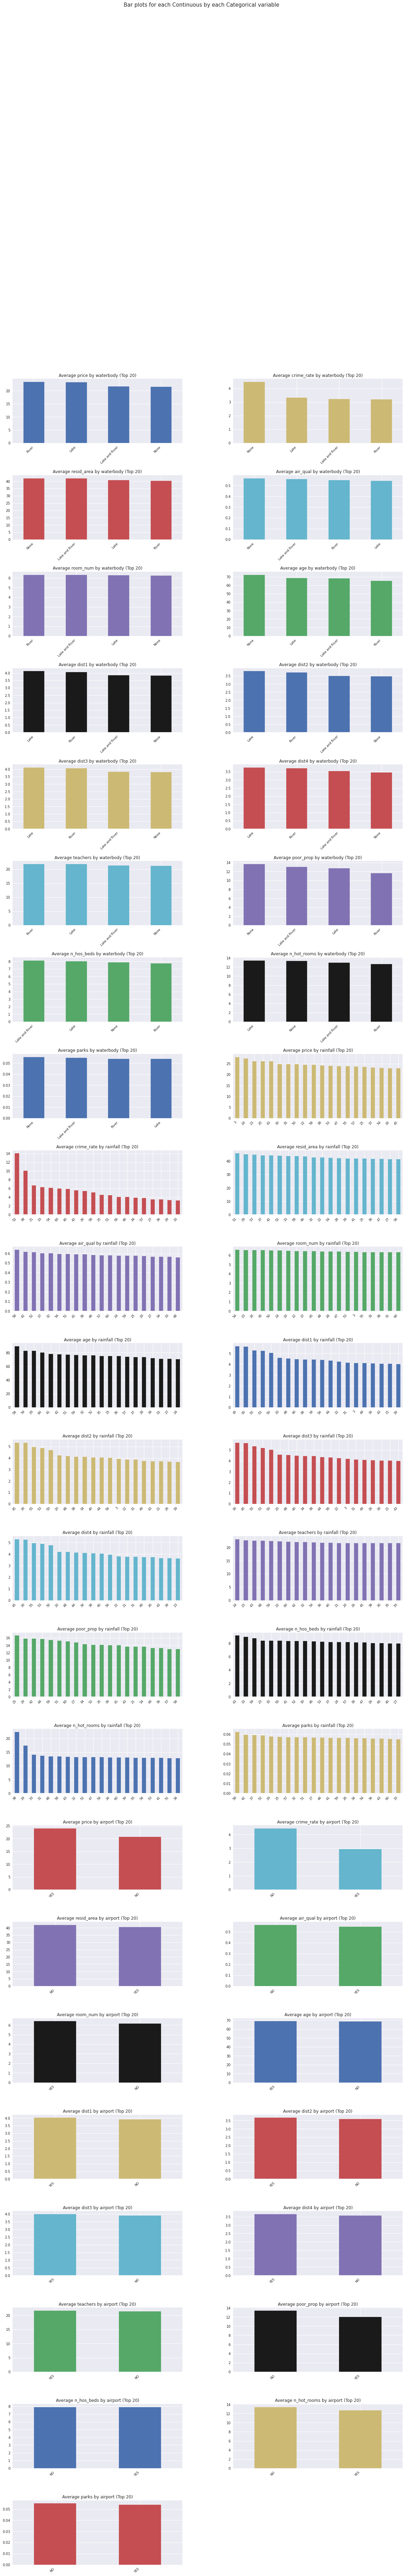

Time to run AutoViz (in seconds) = 46.639

 ###################### VISUALIZATION Completed ########################


In [18]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz('../input/others/House_Price.csv')

# Data Visualistion

In [19]:
df['airport'].value_counts()  #two types of categorical data

YES    279
NO     227
Name: airport, dtype: int64

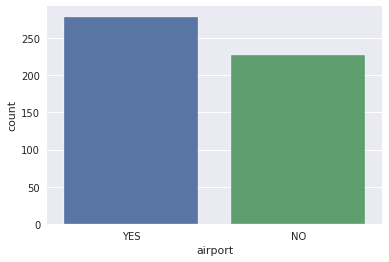

In [20]:
sns.countplot(x = 'airport',data=df)
plt.show()

In [21]:
fig = px.histogram(df, 'price',             
                   color="airport",
                   title="<b>Average Price eith Airport</b>")

fig.add_vline(x=df['price'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

#There is no corelation between price and airport
#when price is 7-8.9,21-22.9,13-14.9,17-18.9 the count of houses having airport is lessthan count of houses not having airport

In [22]:
df['waterbody'].value_counts()  #4 types of categorical data

River             183
None              155
Lake               97
Lake and River     71
Name: waterbody, dtype: int64

In [23]:
fig = px.histogram(df, 'price',             
                   color='waterbody',
                   title="<b>Average price with waterbody</b>")

fig.add_vline(x=df['price'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

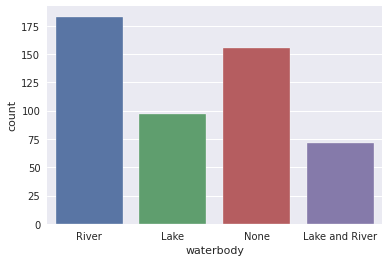

In [24]:
sns.countplot(x = 'waterbody',data = df)
plt.show()

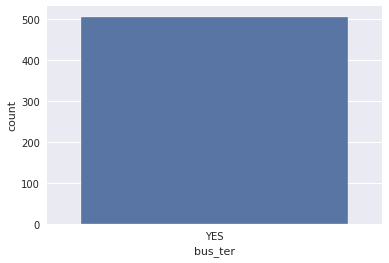

In [25]:
sns.countplot(x = 'bus_ter',data = df)
plt.show()

#only one value in total row

In [26]:
data = [go.Scatter(
                     x = df.price,
                     y = df.poor_prop,
                     mode = 'markers',
                     marker = dict(size = 7, 
                                   color = '#4ED700',
                                   symbol = 'circle',
                                   line = dict(width = 1,color = '#0E8700')
                                  )
                   )
       ]

layout = go.Layout(
                    xaxis = dict(title = '$price$'), # x-axis label
                    yaxis = dict(title = '$poor_prop$'), # y-axis label
                   )

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [27]:
data = [go.Scatter(
                     x = df.price,
                     y = df.room_num,
                     mode = 'markers',
                     marker = dict(size = 7, 
                                   color = '#4ED700',
                                   symbol = 'circle',
                                   line = dict(width = 1,color = '#0E8700')
                                  )
                   )
       ]

layout = go.Layout(
                    xaxis = dict(title = '$price$'), # x-axis label
                    yaxis = dict(title = '$room_num$'), # y-axis label
                   )

fig = go.Figure(data=data, layout=layout)

iplot(fig)

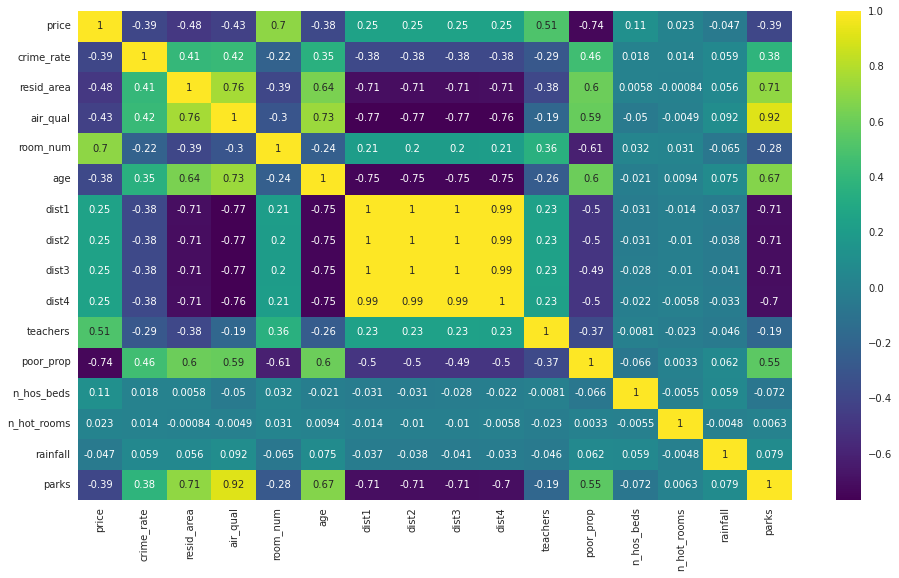

In [28]:
plt.figure(figsize=(16,9))
x = df.drop(['airport','waterbody','bus_ter'],axis = 1)
ax = sns.heatmap(df.corr(),annot = True,cmap = 'viridis')
plt.show()

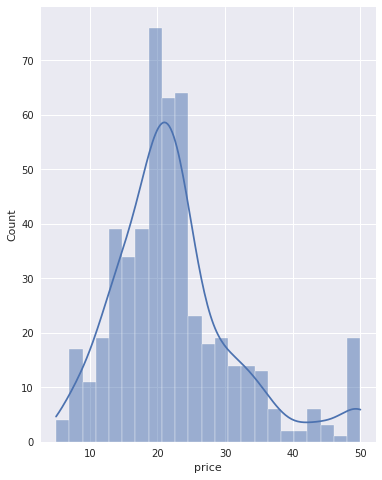

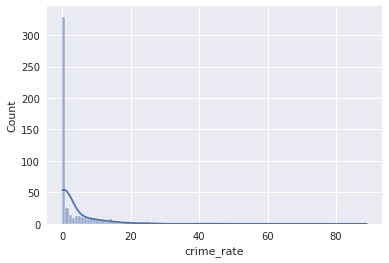

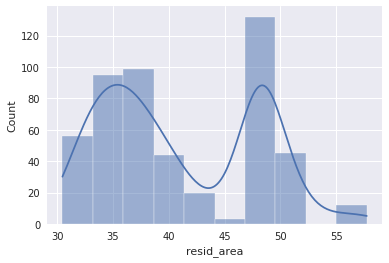

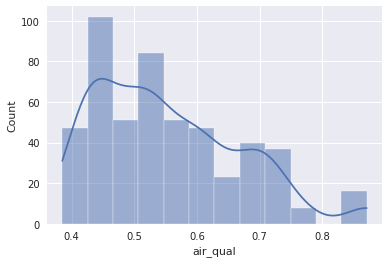

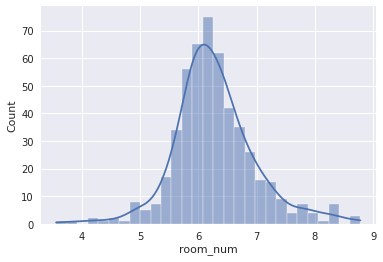

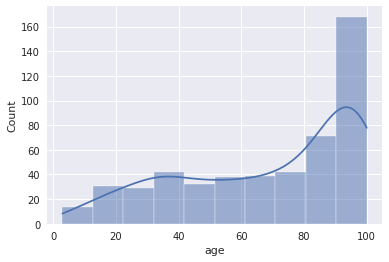

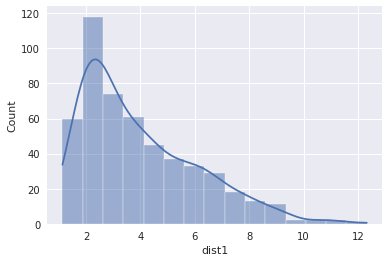

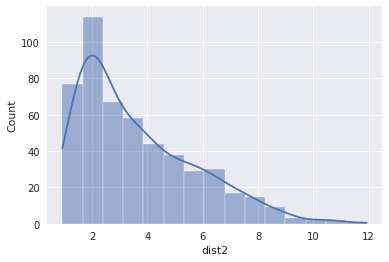

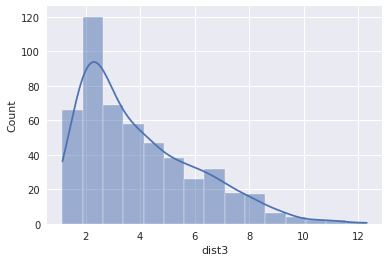

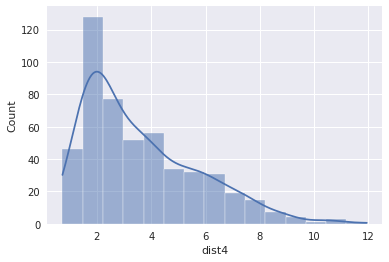

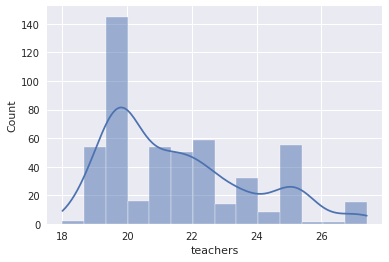

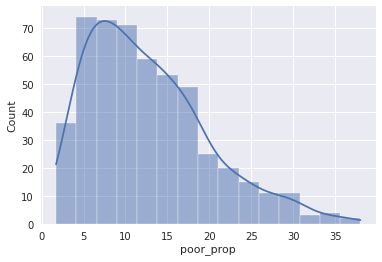

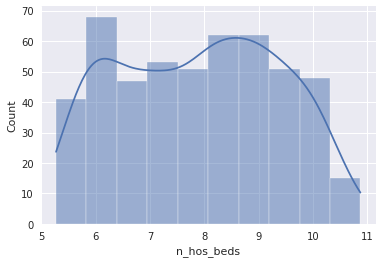

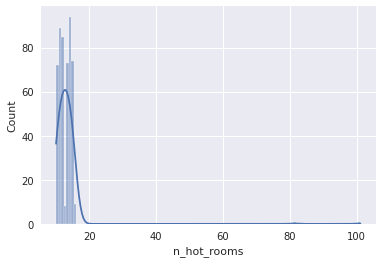

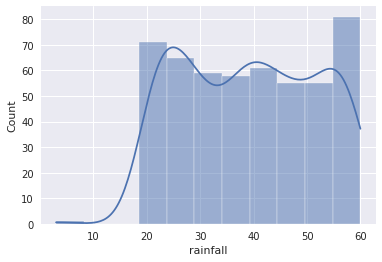

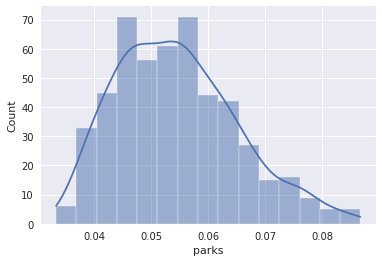

In [29]:
plt.figure(figsize=(6,8))
x = df.drop(['airport','waterbody','bus_ter'],axis = 1)
for i in x.columns:
    sns.histplot(x[i],kde = True)
    plt.show()

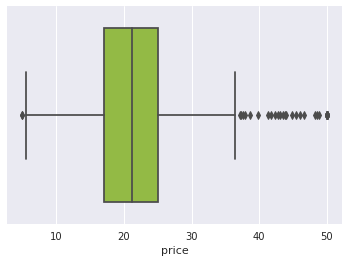

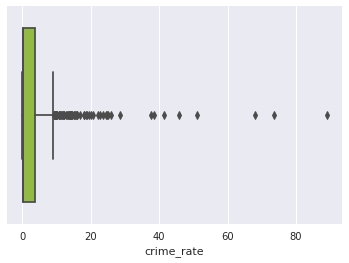

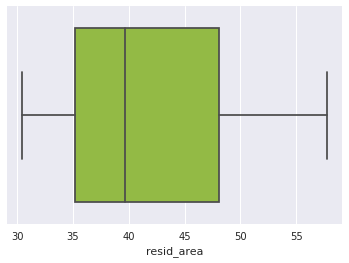

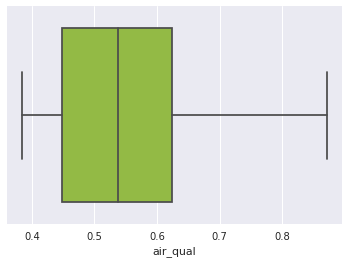

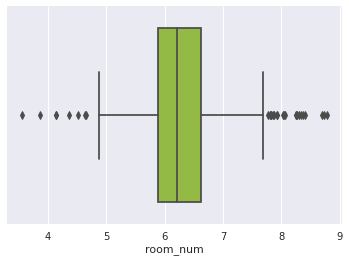

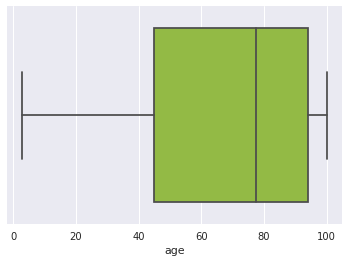

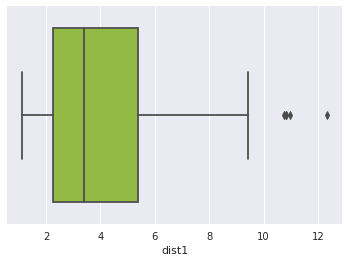

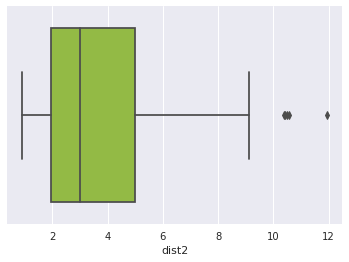

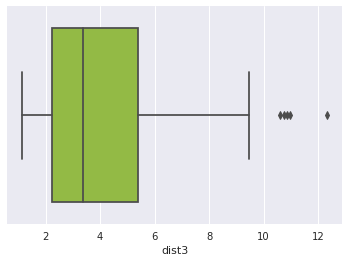

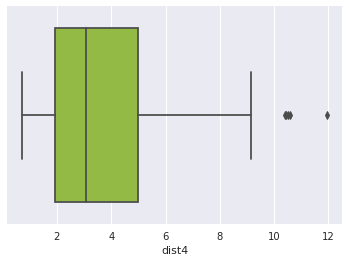

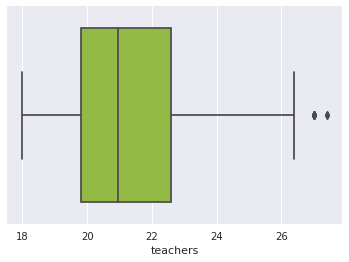

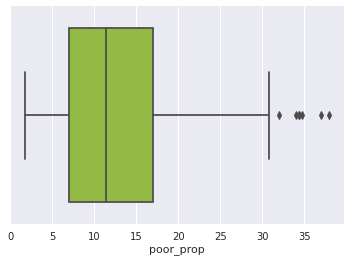

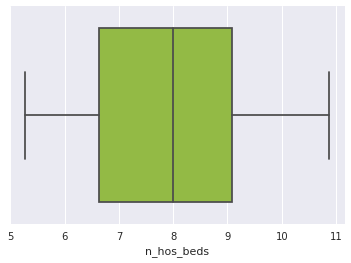

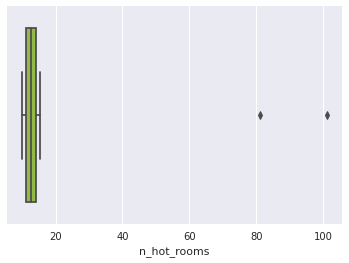

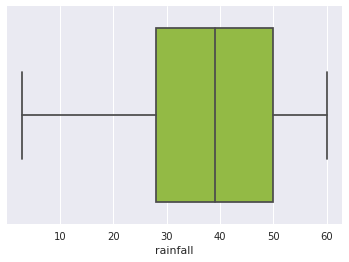

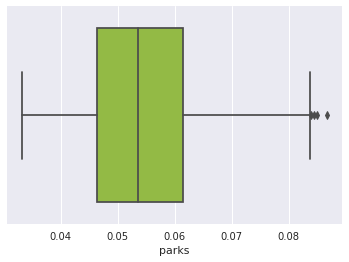

In [30]:
x = df.drop(['airport','waterbody','bus_ter'],axis = 1)
for i in x.columns:
    sns.boxplot(x = i, data = x,color = 'yellowgreen')
    plt.xlabel(i)
    plt.show()

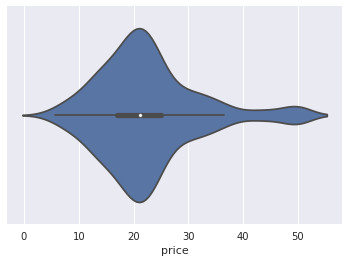

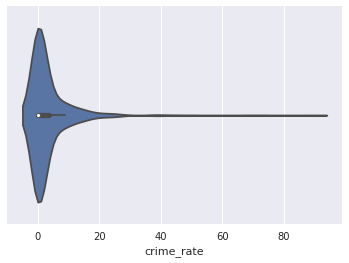

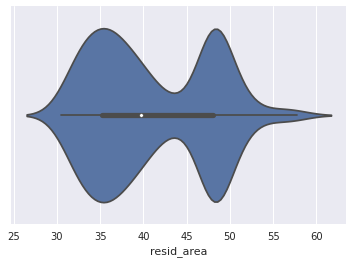

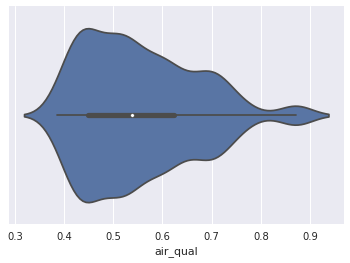

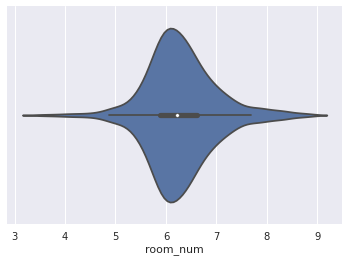

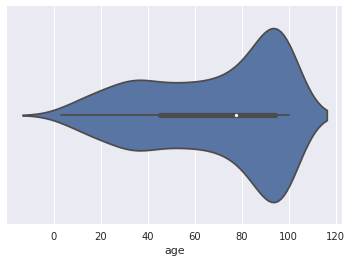

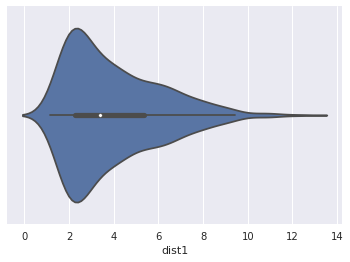

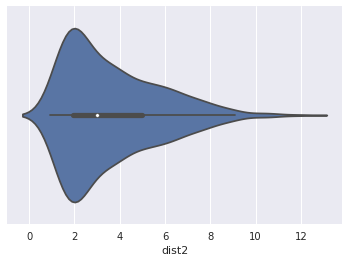

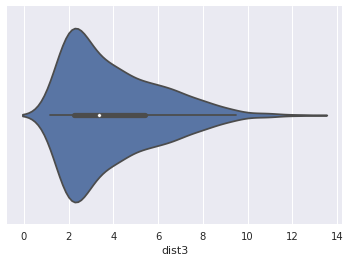

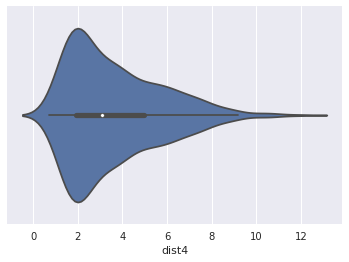

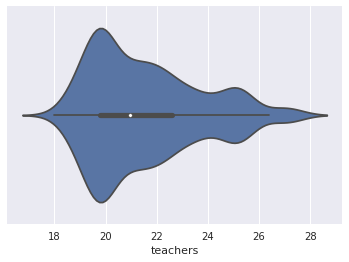

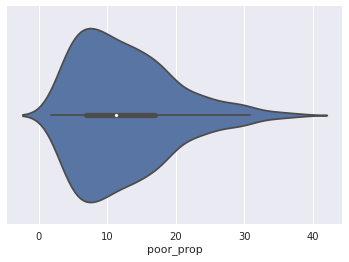

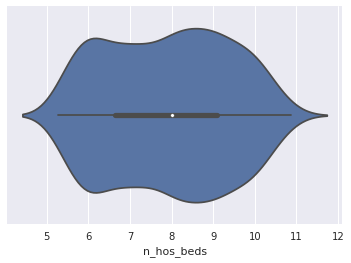

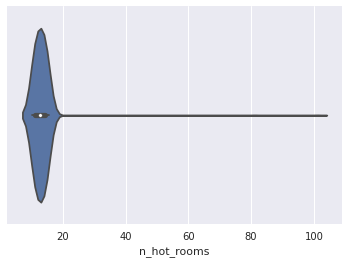

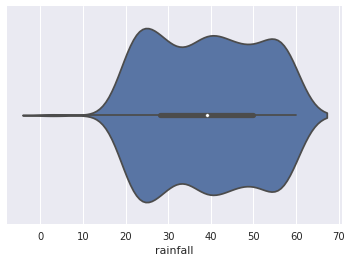

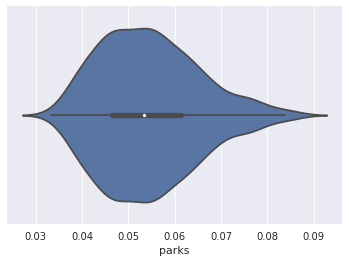

In [31]:
x = df.drop(['airport','waterbody','bus_ter'],axis = 1)
for i in x.columns:
    sns.violinplot(x = i, data = x)
    plt.xlabel(i)
    plt.show()

# Count of Outliers

In [32]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x.columns:
    count_outliers(x,i)

There are outliers in price
Count of outliers are: 37
There are outliers in crime_rate
Count of outliers are: 66
No outliers in resid_area
No outliers in air_qual
There are outliers in room_num
Count of outliers are: 30
No outliers in age
There are outliers in dist1
Count of outliers are: 5
There are outliers in dist2
Count of outliers are: 5
There are outliers in dist3
Count of outliers are: 5
There are outliers in dist4
Count of outliers are: 5
There are outliers in teachers
Count of outliers are: 15
There are outliers in poor_prop
Count of outliers are: 6
No outliers in n_hos_beds
There are outliers in n_hot_rooms
Count of outliers are: 2
No outliers in rainfall
There are outliers in parks
Count of outliers are: 4


# Data Cleaning

In [33]:
df.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 'airport',
       'n_hos_beds', 'n_hot_rooms', 'waterbody', 'rainfall', 'bus_ter',
       'parks'],
      dtype='object')

In [34]:
df = df.rename(columns={'n_hos_beds': 'n_hot_beds'})
df.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 'airport',
       'n_hot_beds', 'n_hot_rooms', 'waterbody', 'rainfall', 'bus_ter',
       'parks'],
      dtype='object')

# Data Preprocessing

## Treating Null Values

In [35]:
#since ther are no outliers in n_hot_beds column we can fill null values with mean
df['n_hot_beds'].fillna(df['n_hot_beds'].mean(),inplace=True)

In [36]:
df.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hot_beds     0
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [37]:
df

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0     24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1     21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2     34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3     33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4     36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   
..     ...         ...         ...       ...       ...   ...    ...    ...   
501   22.4     0.06263       41.93     0.573     6.593  69.1   2.64   2.45   
502   20.6     0.04527       41.93     0.573     6.120  76.7   2.44   2.11   
503   23.9     0.06076       41.93     0.573     6.976  91.0   2.34   2.06   
504   22.0     0.10959       41.93     0.573     6.794  89.3   2.54   2.31   
505   19.0     0.04741       41.93     0.573     6.030  80.8   2.72   2.24   

     dist3  dist4  teachers  poor_prop airport  n_hot_beds  n_hot_rooms  \
0     4.18   4.01      24.7       4.98     YES       5.480      11.1920   
1     5.12   5.06      22.2       9.14      NO       7.332      12.1728   
2     5.01   4.97      22.2       4.03      NO       7.394     101.1200   
3     6.16   5.96      21.3       2.94     YES       9.268      11.2672   
4     6.37   5.86      21.3       5.33      NO       8.824      11.2896   
..     ...    ...       ...        ...     ...         ...          ...   
501   2.76   2.06      19.0       9.67      NO       9.348      12.1792   
502   2.46   2.14      19.0       9.08     YES       6.612      13.1648   
503   2.29   1.98      19.0       5.64      NO       5.478      12.1912   
504   2.40   2.31      19.0       6.48     YES       7.940      15.1760   
505   2.64   2.42      19.0       7.88     YES      10.280      10.1520   

          waterbody  rainfall bus_ter     parks  
0             River        23     YES  0.049347  
1              Lake        42     YES  0.046146  
2              None        38     YES  0.045764  
3              Lake        45     YES  0.047151  
4              Lake        55     YES  0.039474  
..              ...       ...     ...       ...  
501  Lake and River        27     YES  0.056006  
502  Lake and River        20     YES  0.059903  
503            None        31     YES  0.057572  
504            None        47     YES  0.060694  
505            None        45     YES  0.060336  

[506 rows x 19 columns]

In [38]:
df1=pd.get_dummies(data=df,columns=['airport','waterbody','bus_ter'],drop_first=True)

In [39]:
df1

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0     24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1     21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2     34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3     33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4     36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   
..     ...         ...         ...       ...       ...   ...    ...    ...   
501   22.4     0.06263       41.93     0.573     6.593  69.1   2.64   2.45   
502   20.6     0.04527       41.93     0.573     6.120  76.7   2.44   2.11   
503   23.9     0.06076       41.93     0.573     6.976  91.0   2.34   2.06   
504   22.0     0.10959       41.93     0.573     6.794  89.3   2.54   2.31   
505   19.0     0.04741       41.93     0.573     6.030  80.8   2.72   2.24   

     dist3  dist4  teachers  poor_prop  n_hot_beds  n_hot_rooms  rainfall  \
0     4.18   4.01      24.7       4.98       5.480      11.1920        23   
1     5.12   5.06      22.2       9.14       7.332      12.1728        42   
2     5.01   4.97      22.2       4.03       7.394     101.1200        38   
3     6.16   5.96      21.3       2.94       9.268      11.2672        45   
4     6.37   5.86      21.3       5.33       8.824      11.2896        55   
..     ...    ...       ...        ...         ...          ...       ...   
501   2.76   2.06      19.0       9.67       9.348      12.1792        27   
502   2.46   2.14      19.0       9.08       6.612      13.1648        20   
503   2.29   1.98      19.0       5.64       5.478      12.1912        31   
504   2.40   2.31      19.0       6.48       7.940      15.1760        47   
505   2.64   2.42      19.0       7.88      10.280      10.1520        45   

        parks  airport_YES  waterbody_Lake and River  waterbody_None  \
0    0.049347            1                         0               0   
1    0.046146            0                         0               0   
2    0.045764            0                         0               1   
3    0.047151            1                         0               0   
4    0.039474            0                         0               0   
..        ...          ...                       ...             ...   
501  0.056006            0                         1               0   
502  0.059903            1                         1               0   
503  0.057572            0                         0               1   
504  0.060694            1                         0               1   
505  0.060336            1                         0               1   

     waterbody_River  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0  
..               ...  
501                0  
502                0  
503                0  
504                0  
505                0  

[506 rows x 20 columns]

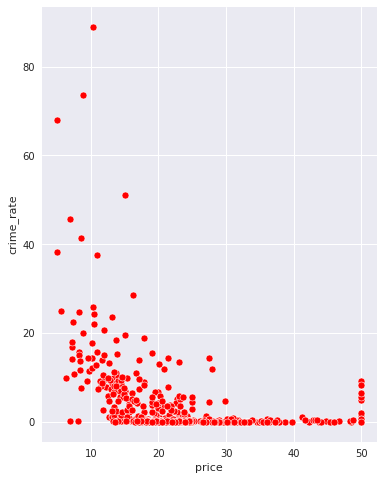

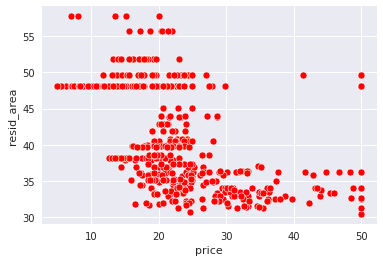

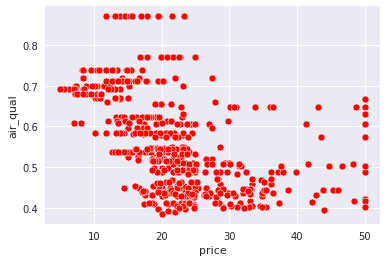

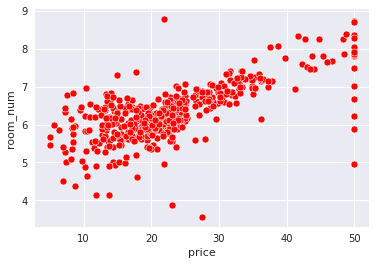

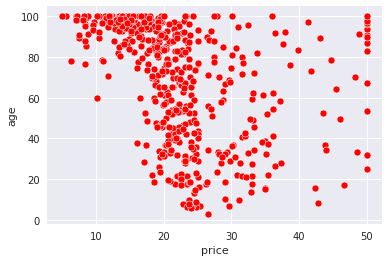

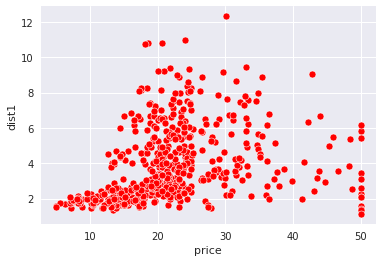

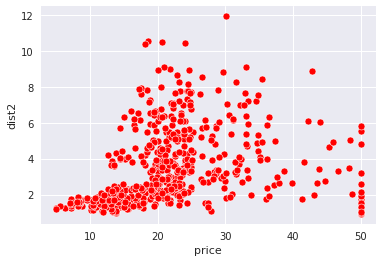

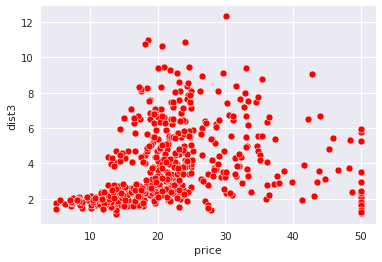

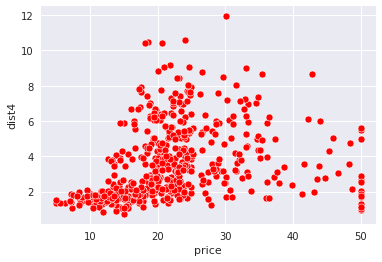

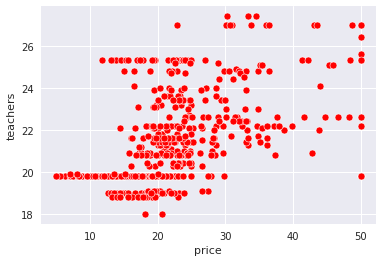

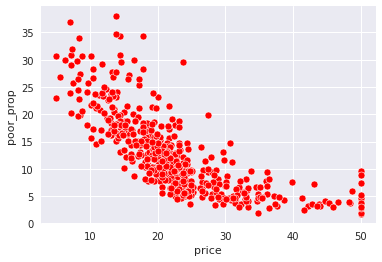

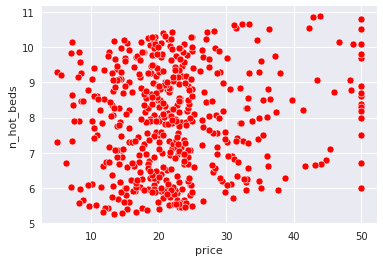

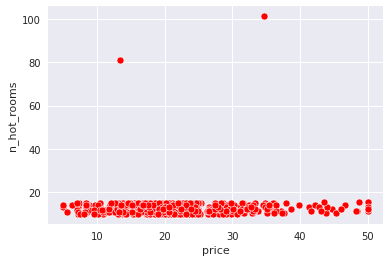

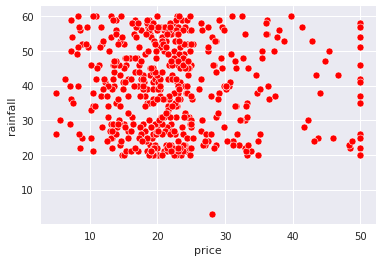

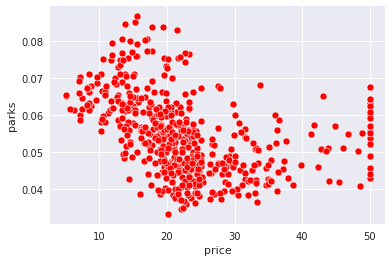

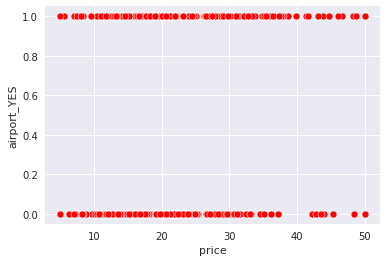

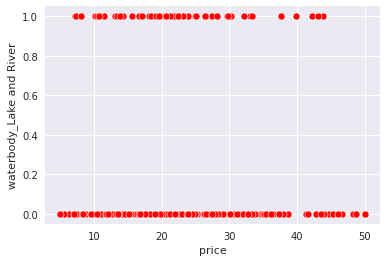

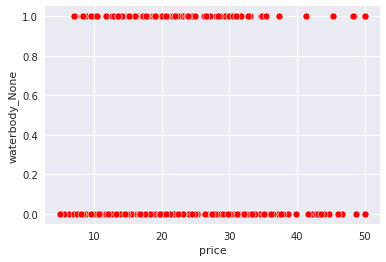

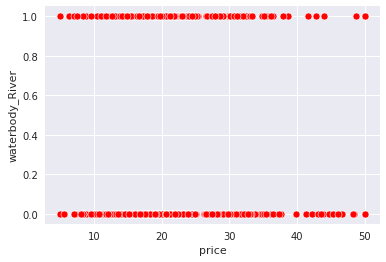

In [40]:
plt.figure(figsize=(6,8))
for i in df1.columns[1:]:
    sns.scatterplot(x = 'price',y = i,data = df1,color = 'Red')
    plt.show()
    
#price and crime_rate has negative corelation
#price and room_num has highly positive corelation
#price and poor_prop has highly negative corelation
#No corelation between price and n_hotbeds,n_hot_rooms_,rainfall,parks

# Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1.drop(['price'],axis = 1))

StandardScaler()

# Feature Selection

In [42]:
X = df1.drop(['price'],axis = 1)
Y = df1['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

# Prediction Using Linear Regression

In [43]:
X = df1.drop(['price'],axis = 1)
Y = df1['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

In [44]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [45]:
# regression coefficients
reg.coef_

array([-7.17051315e-02, -9.81469174e-02, -1.89323476e+01,  3.43364639e+00,
       -4.99118112e-03,  1.37231465e+00,  1.70102750e+00, -4.89821147e+00,
        3.84673715e-01,  1.04849288e+00, -5.39471292e-01,  3.71249872e-01,
        3.02024663e-02, -2.82357952e-03,  3.35584954e+01,  8.59959647e-01,
       -7.07119856e-01,  4.14264793e-01, -9.12301711e-01])

In [46]:
pred = reg.predict(X_test)
pred

array([17.39650489, 23.0232718 , 20.14731405, 31.30278533, 16.12247775,
       33.49881219, 17.79345143, 24.63924121, 27.84759227, 21.59070865,
       23.87354005, 23.42857134, 17.03683737, 24.70639667, 28.04746725,
        8.28603489, 23.46204248, 23.74133314, 16.57400738, 17.36879388,
       30.83981907, 28.98136006, 36.93690655, 22.64389087, 15.74837005,
       23.62520043, -2.87993185, 16.04997705, 14.08873365, 34.71991554,
       20.6240925 , 16.85211496, 16.22017897, 17.91127119, 21.92340596,
       20.9232905 , 20.98969686, 33.82401049, 27.75899876, 27.91230692,
       16.79204939, 14.75686746, 31.40099259, 22.19926079, 18.62706636,
       14.22926224, 31.98908236, 32.79085948, 13.43993376, 19.11108956,
       30.88569123, 23.40544417, 14.60830177, 12.77477721, 28.0106237 ,
       15.75193157, 35.75398178, 38.74973525, 12.6531612 , 21.45144405,
       15.60740083, 10.53641623, 18.76629965, 22.08954027, 27.55706478,
       19.05408459, 27.86738958, 26.35081073, 30.23643427, 28.91

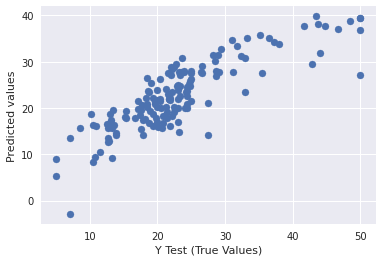

In [47]:
plt.scatter(Y_test,pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [48]:
print('Mean Absolute Error',metrics.mean_absolute_error(Y_test,pred))
print('Mean Squared Error',metrics.mean_squared_error(Y_test,pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

Mean Absolute Error 3.640897025099605
Mean Squared Error 23.991506243947057
Root Mean Squared Error 4.89811251850619


In [49]:
#r2_score
metrics.explained_variance_score(Y_test,pred)

0.721865997786329

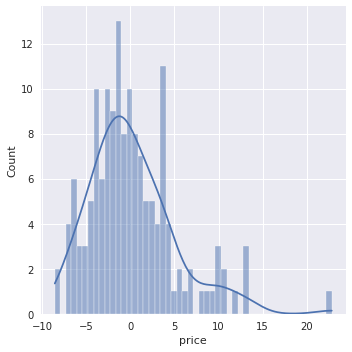

In [50]:
# Here our curve is almost normally distributed so model is ok
sns.displot(Y_test-pred,bins = 50,kde = True)

In [51]:
# This indicates that if 1 unit of increase in price takesplace then -0.071705 decrease in crime_rate
cdf = pd.DataFrame(reg.coef_,X.columns,columns = ['coef'])
cdf

coef
crime_rate                -0.071705
resid_area                -0.098147
air_qual                 -18.932348
room_num                   3.433646
age                       -0.004991
dist1                      1.372315
dist2                      1.701028
dist3                     -4.898211
dist4                      0.384674
teachers                   1.048493
poor_prop                 -0.539471
n_hot_beds                 0.371250
n_hot_rooms                0.030202
rainfall                  -0.002824
parks                     33.558495
airport_YES                0.859960
waterbody_Lake and River  -0.707120
waterbody_None             0.414265
waterbody_River           -0.912302